In [1]:
!pip install python-docx 
!pip install deeppavlov
!pip install kmapper
!pip install chart-studio

     |████████████████████████████████| 5.5MB 20.1MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.10-cp36-none-any.whl size=184491 sha256=a4b5dff6d583983f49a98d712ee5258ee9b50423148e87f41fd76c837b7085c7
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx
     |████████████████████████████████| 737kB 13.9MB/s 
     |████████████████████████████████| 163kB 21.6MB/s 
     |████████████████████████████████| 8.0MB 38.7MB/s 
     |████████████████████████████████| 17.3MB 187kB/s 
     |████████████████████████████████| 10.1MB 38.0MB/s 
     |████████████████████████████████| 25.2MB 1.4MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 2.1MB 44.1MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 317kB 62.8MB/s 
     |██████████████████████████

In [1]:
import deeppavlov
from deeppavlov.models.embedders.elmo_embedder import ELMoEmbedder
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec
import codecs
import numpy as np
import pandas as pd
import docx
import re
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from pymystem3 import Mystem
from sklearn.manifold import TSNE
import kmapper as km
from kmapper import jupyter
import umap
import sklearn
import collections
from chart_studio.plotly import plot, iplot
import plotly
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.cm as cm
import plotly.offline
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## Содержание.

**ТК состоит из 6 частей, 12 разделов, 62 глав и 424 статей(не считая подпункты, например Статья 330.3).** 

ЧАСТЬ 1.

* Раздел I.

Глава 1.(ст.1-14) Глава 2.(ст.15-22)

ЧАСТЬ 2.

* Раздел II.

Глава 3.(ст.23-28) Глава 4.(ст.29-34) Глава 5.(ст.35) 
Глава 6.(ст.36-39)Глава 7.(ст.40-51) Глава 8.(ст.52-53)
Глава 9.(ст.54-55)

ЧАСТЬ 3.

* Раздел III.

Глава 10.(ст.56-62) Глава 11.(ст.63-71) Глава 12.(ст.72-76)
Глава 13.(ст.77-84) Глава 14.(ст.85-90)

* Раздел IV. 

Глава 15.(ст.91-99) Глава 16.(ст.100-105)

* Раздел V. 

Глава 17.(ст.106-107) Глава 18.(ст.108-113) Глава 19.(ст.114-128)

* Раздел VI.

Глава 20.(ст.129-132) Глава 21.(ст.133-158) Глава 22.(ст.159-163)

* Раздел VII.

Глава 23.(ст.164-166) Глава 24.(ст.167-169) Глава 25.(ст.170-172) 
Глава 26.(ст.173-177) Глава 27.(ст.178-181) Глава 28.(ст.182-188)

* Раздел VIII.

Глава 29.(ст.189-190) Глава 30.(ст.191-195)

* Раздел VIX.

Глава 31.(ст.195.1-197) Глава 32.(ст.198-208)

* Раздел X.

Глава 33.(ст.209-210) Глава 34.(ст.211-215)
Глава 35.(ст.216-218) Глава 36.(ст.219-231)

* Раздел XI.

Глава 37.(ст.232-233) Глава 38.(ст.234-237)
Глава 39.(ст.238-250)

ЧАСТЬ 4.

* Раздел XII.

Глава 40.(ст.251-252) Глава 41.(ст.253-264) Глава 42.(ст.265-272)
Глава 43.(ст.273-281) Глава 44.(ст.282-288) Глава 45.(ст.289-292)
Глава 46.(ст.293-296) Глава 47.(ст.297-302) Глава 48.(ст.303-309) 
Глава 49.(ст.310-312) Глава 49.1.(ст.312.1-312.5) 
Глава 50.(ст.313-327) Глава 51.(ст.328-330) 
Глава 51.1.(ст.330.1-330.5) Глава 52.(ст.331-336) 
Глава 53.(ст.337-341) Глава 54.(ст.342-348) 
Глава 54-1.(ст.348.1-348.12) Глава 55.(ст.349-351.2)

ЧАСТЬ 5.

* Раздел XIII.

Глава 56.(ст.352) Глава 57.(ст.353-369) Глава 58.(ст.370-378)
Глава 59.(ст.379-380) Глава 60.(ст.381-398) Глава 61.(ст.399-418) 
Глава 62.(ст.419)

ЧАСТЬ 6.

* Раздел XIV.
(ст.420-424)

## Чтение ТК

In [0]:
document = docx.Document("drive/My Drive/LabourCode.docx")
text_, text = list(),list()
chapter_, chapter = '', ''
for paragraph in document.paragraphs:
    if paragraph.text!='':
        if paragraph.text.startswith('Статья') and chapter!='' and chapter_!='':
            text.append(chapter)
            text_.append(chapter_)
            chapter = ''
            chapter_ = ''
        if paragraph.text.endswith(('.',';',':')):
            chapter = chapter + paragraph.text
            chapter_ = chapter_ + paragraph.text
            if paragraph.text.endswith(('.',';')): #??????
                chapter = chapter[:-1] + '</s>'
        else:
            chapter = chapter + paragraph.text + '</s>'
            chapter_ = chapter_ + paragraph.text + '.'

In [266]:
labourcode_ = text_[1:] #usual text
labourcode = text[1:] # text with separator </s>
labourcode_[0:5]

['Статья 1. Цели и задачи трудового законодательства.Целями трудового законодательства являются установление государственных гарантий трудовых прав и свобод граждан, создание благоприятных условий труда, защита прав и интересов работников и работодателей.Основными задачами трудового законодательства являются создание необходимых правовых условий для достижения оптимального согласования интересов сторон трудовых отношений, интересов государства, а также правовое регулирование трудовых отношений и иных непосредственно связанных с ними отношений по:организации труда и управлению трудом;трудоустройству у данного работодателя;подготовке и дополнительному профессиональному образованию работников непосредственно у данного работодателя;(в ред. Федерального закона от 02.07.2013 N 185-ФЗ).социальному партнерству, ведению коллективных переговоров, заключению коллективных договоров и соглашений;участию работников и профессиональных союзов в установлении условий труда и применении трудового законод

In [0]:
print(labourcode[0])

Статья 1. Цели и задачи трудового законодательства</s>Целями трудового законодательства являются установление государственных гарантий трудовых прав и свобод граждан, создание благоприятных условий труда, защита прав и интересов работников и работодателей</s>Основными задачами трудового законодательства являются создание необходимых правовых условий для достижения оптимального согласования интересов сторон трудовых отношений, интересов государства, а также правовое регулирование трудовых отношений и иных непосредственно связанных с ними отношений по:организации труда и управлению трудом</s>трудоустройству у данного работодателя</s>подготовке и дополнительному профессиональному образованию работников непосредственно у данного работодателя</s>(в ред. Федерального закона от 02.07.2013 N 185-ФЗ)</s>социальному партнерству, ведению коллективных переговоров, заключению коллективных договоров и соглашений</s>участию работников и профессиональных союзов в установлении условий труда и применени

In [0]:
pattern = re.compile(r"^Статья ([\d|\.]+)\. (.*)$")
data_, data = {}, {}
for article in labourcode_:
    d = re.findall(pattern, article)
    if len(d)!=0:
        data_[d[0][0]] = d[0][1]
for article in labourcode:
    d = re.findall(pattern, article)
    if len(d)!=0:
        data[d[0][0]] = d[0][1]

In [0]:
lc = {'article №': list(data_.keys()), 'text': list(data_.values()), 'clean text': list(data.values()), 'list tokens': list(data.values())}

In [0]:
df = pd.DataFrame(lc)

## Preprocessing

In [0]:
def preprocess_text(text):
    text = text.lower()
    sentences = text.split('</s>')
    sentences_, tokens = list(), list()
    punctuation = '!"#$%&():*+-/<=>?@[\]^_`{|}~,'
    for sent in sentences:
      for p in punctuation:
          sent = sent.replace(p, ' ')
      sentences_.append(sent + '</s>')
    text = " ".join(sentences_)
    return text

def get_tokens(text):
  tokens= list()
  sentences = text.split('</s>')
  sentences = [s for s in sentences if s!='']
  for sent in sentences:
    s_tokens = nltk.word_tokenize(sent, language='russian')
    s_tokens = [token for token in s_tokens if token != " "]
    if len(s_tokens)!=0:
      tokens.append(s_tokens)
  return tokens

In [0]:
for i in range(len(df['clean text'])):
    df['clean text'][i] = preprocess_text(df['clean text'][i])
    df['list tokens'][i] = get_tokens(df['clean text'][i])

In [10]:
df.sample(10)

,article №,text,clean text,list tokens
136,125,Разделение ежегодного оплачиваемого отпуска на...,разделение ежегодного оплачиваемого отпуска на...,"[[разделение, ежегодного, оплачиваемого, отпус..."
368,327.6,Особенности прекращения трудового договора с р...,особенности прекращения трудового договора с р...,"[[особенности, прекращения, трудового, договор..."
285,260,Гарантии женщинам в связи с беременностью и ро...,гарантии женщинам в связи с беременностью и ро...,"[[гарантии, женщинам, в, связи, с, беременност..."
215,196,Права и обязанности работодателя по подготовке...,права и обязанности работодателя по подготовке...,"[[права, и, обязанности, работодателя, по, под..."
216,197,Право работников на подготовку и дополнительно...,право работников на подготовку и дополнительно...,"[[право, работников, на, подготовку, и, дополн..."
11,12,Действие трудового законодательства и иных акт...,действие трудового законодательства и иных акт...,"[[действие, трудового, законодательства, и, ин..."
19,19.1,"Трудовые отношения, возникающие на основании т...",трудовые отношения возникающие на основании т...,"[[трудовые, отношения, возникающие, на, основа..."
129,118,Ежегодный дополнительный оплачиваемый отпуск з...,ежегодный дополнительный оплачиваемый отпуск з...,"[[ежегодный, дополнительный, оплачиваемый, отп..."
442,361,Обжалование решений государственных инспекторо...,обжалование решений государственных инспекторо...,"[[обжалование, решений, государственных, инспе..."
286,261,Гарантии беременной женщине и лицам с семейным...,гарантии беременной женщине и лицам с семейным...,"[[гарантии, беременной, женщине, и, лицам, с, ..."


## Embeddings

In [0]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

In [11]:
elmo = ELMoEmbedder("http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-wiki_600k_steps.tar.gz")

Using TensorFlow backend.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


### Simple example of sentence embedding

In [0]:
sent1 = elmo([['вопрос', 'жизни', 'Вселенной', 'и', 'вообще', 'всего']])
sent1

array([[-0.22791581,  0.07285882, -0.4693267 , ...,  0.32489085,
         0.16321455, -0.15760408]], dtype=float32)

In [0]:
sent1.shape

(1, 1024)

### Embeddings of the Labour Code

In [12]:
sent = elmo(df['list tokens'][0])
sent, sent.shape, len(df['list tokens'][0])

(array([[-0.15408754,  0.12447143,  0.12541609, ...,  0.43871307,
          0.8080331 , -0.61087495],
        [-0.16363786, -0.5031319 , -0.01882292, ...,  0.08774548,
          0.77206606, -0.4888939 ],
        [-0.30584   , -0.06840444, -0.22929925, ...,  0.218365  ,
          0.40028194, -0.2930496 ],
        ...,
        [ 0.9814391 , -0.44105062, -0.00118074, ...,  0.65208226,
          0.37582895, -0.6856761 ],
        [-0.01316513, -0.42242444,  0.12800948, ..., -0.6165901 ,
          0.29703546, -0.6499797 ],
        [-0.4453516 , -0.2231226 ,  0.1295613 , ..., -0.72629577,
          0.622035  , -0.09071245]], dtype=float32), (14, 1024), 14)

In [0]:
embeddings = list()
for i in range(len(df['list tokens'])):
  embeddings.append(elmo(df['list tokens'][i]))

df['embedding'] = embeddings

In [14]:
df.sample(10)

,article №,text,clean text,list tokens,embedding
458,377,Обязанности работодателя по созданию условий д...,обязанности работодателя по созданию условий д...,"[[обязанности, работодателя, по, созданию, усл...","[[-0.2757097, 0.17693666, -0.6215924, -0.40906..."
131,120,Исчисление продолжительности ежегодных оплачив...,исчисление продолжительности ежегодных оплачив...,"[[исчисление, продолжительности, ежегодных, оп...","[[0.07931159, -0.38407332, -0.15020771, -0.570..."
77,69,Медицинский осмотр при заключении трудового до...,медицинский осмотр при заключении трудового до...,"[[медицинский, осмотр, при, заключении, трудов...","[[-0.69470596, -0.44146565, -0.61218, 0.407515..."
177,165,Случаи предоставления гарантий и компенсаций.П...,случаи предоставления гарантий и компенсаций</...,"[[случаи, предоставления, гарантий, и, компенс...","[[0.4060019, -0.66008246, -0.33620188, 0.01592..."
150,138,Ограничение размера удержаний из заработной пл...,ограничение размера удержаний из заработной пл...,"[[ограничение, размера, удержаний, из, заработ...","[[-0.028587699, -0.05651939, 0.17876214, -0.06..."
69,64,Гарантии при заключении трудового договора.Зап...,гарантии при заключении трудового договора</s>...,"[[гарантии, при, заключении, трудового, догово...","[[0.21103437, -0.119797565, -0.67994356, 0.044..."
345,312.3,Особенности организации и охраны труда дистанц...,особенности организации и охраны труда дистанц...,"[[особенности, организации, и, охраны, труда, ...","[[-0.057669125, -0.29806238, 0.24103837, -0.28..."
126,115,Продолжительность ежегодного основного оплачив...,продолжительность ежегодного основного оплачив...,"[[продолжительность, ежегодного, основного, оп...","[[-0.23504484, -1.0676835, -0.33688748, -0.196..."
403,346,Материальная ответственность работников религи...,материальная ответственность работников религи...,"[[материальная, ответственность, работников, р...","[[-0.07692032, -0.0090608895, -0.31423467, -0...."
393,341.1,Общие положения.Частное агентство занятости ил...,общие положения</s> частное агентство занятост...,"[[общие, положения], [частное, агентство, заня...","[[-0.41168863, -0.478253, -0.086065084, -0.214..."


In [0]:
df.to_csv(r'drive/My Drive/dataframe_LabourCode.csv', index = False)

## Visualization

In [0]:
def tsne_plot(case, ind, n_perplex, arr=list()):

    #labels = df['clean text'][ind].split('</s>')
    #labels = [l for l in labels if l!='']
    if case==0:
      labels = ['sentence ' + str(i) for i in range(1,len(df['list tokens'][ind])+1)]
      tokens = list(df['embedding'][ind])
      tokens = [list(t) for t in tokens]
    if case==1:
      labels, tokens = list(), list()
      for j in arr:
        for i in range(1,len(df['list tokens'][j])+1):
          labels.append(str(j+1) +'.'+str(i))
        for t in list(df['embedding'][j]):
          tokens.append(list(t))


    #tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    tsne_model = TSNE(perplexity=n_perplex, n_components=2, init='pca', n_iter=5000, random_state=32)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    if case==0: plt.title("Embeddings of article №"+df['article №'][ind])
    if case==1: plt.title("Embeddings of chapter №"+ str(ind))
    plt.show()

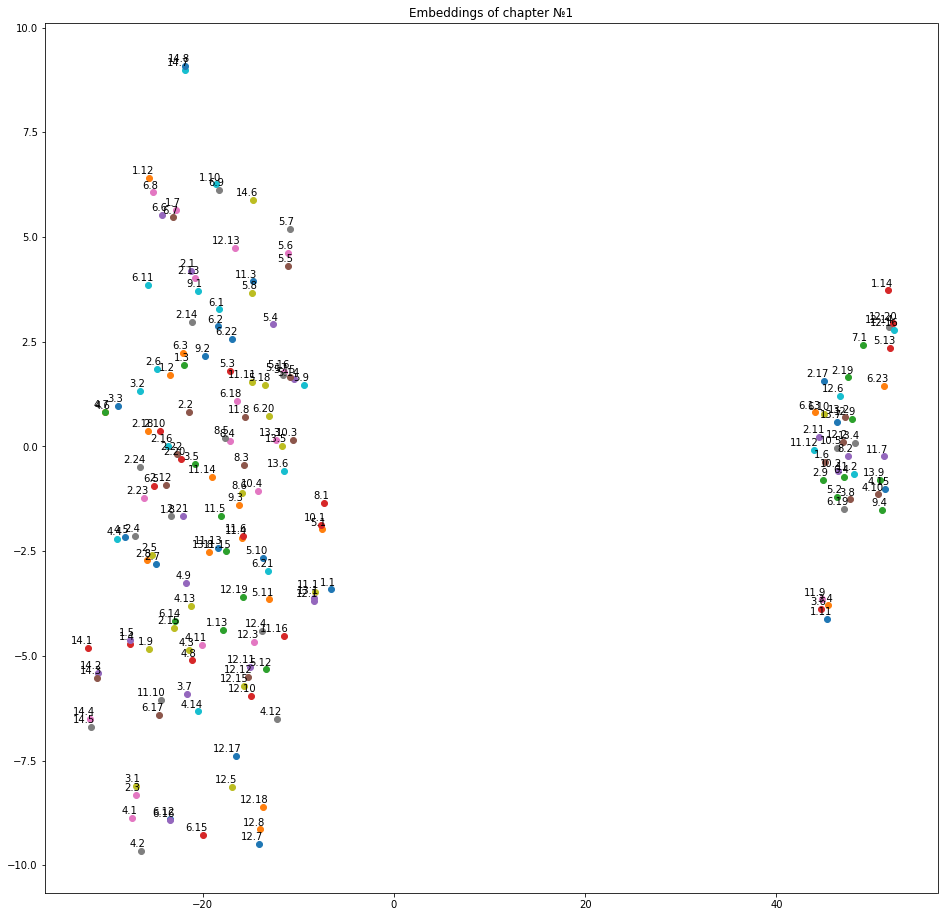

In [54]:
tsne_plot(1, 1, 20, [i for i in range(0,14)])

In [0]:
def tsne_plot_(case, ind, n_perplex, filename = '', arr=list()):

    #labels = df['clean text'][ind].split('</s>')
    #labels = [l for l in labels if l!='']
    if case==0:
      labels = ['sentence ' + str(i) for i in range(1,len(df['list tokens'][ind])+1)]
      tokens = list(df['embedding'][ind])
      tokens = [list(t) for t in tokens]
      colors = [ind+1 for i in range(len(labels))]
    if case==1:
      labels, tokens, colors = list(), list(), list()
      for j in arr:
        for i in range(1,len(df['list tokens'][j])+1):
          colors.append(j+1)
          labels.append(str(j+1) +'.'+str(i))
        for t in list(df['embedding'][j]):
          tokens.append(list(t))

    #tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    tsne_model = TSNE(perplexity=n_perplex, n_components=2, init='pca', n_iter=5000, random_state=32)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    fig = go.Figure(go.Scatter(x=x, y=y, text=labels, mode='markers', marker_color=colors))
    if case==0: fig.update_layout(title_text="Embeddings of article №"+df['article №'][ind])
    if case==1: fig.update_layout(title_text="Embeddings of chapter №"+ str(ind))
    fig.show()
    plotly.offline.plot(fig, filename = 'drive/My Drive/'+filename +'.html', auto_open=False)

In [110]:
tsne_plot_(0, 1, 50)

In [118]:
tsne_plot_(1, 1, 30, 'chapter1', [i for i in range(0,14)])

In [0]:
def visualize(ind, filename, title="Article №", eps_=0.5, min_samples_=5,n_=35, m_=0.9, show=False):
    title = title + str(ind+1)
    # Initialize
    mapper = km.KeplerMapper(verbose=1)
    # Fit to and transform the data
    projected_data = mapper.fit_transform(df['embedding'][ind], projection=umap.UMAP(n_components=2,
                                                                     metric='cosine')) #euclidean, cosine
    # Create dictionary called 'graph' with nodes, edges and meta-information
    graph = mapper.map(projected_data, clusterer=sklearn.cluster.DBSCAN(eps=eps_, min_samples=min_samples_),
                          cover=km.Cover(n_, m_), remove_duplicate_nodes=True)
    # Visualize it
    path = 'drive/My Drive/'+filename +'.html'
    html = mapper.visualize(graph, path_html=path, title=title)
    if show:
        #jupyter.display(path_html=path)
        km.drawing.draw_matplotlib(graph)

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='cosine',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (24, 1024)

..Projecting data using: 
	UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='cosine',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength

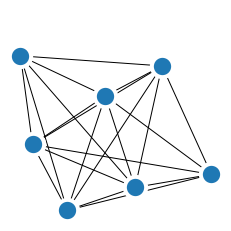

In [272]:
visualize(1, 'Article_2', show=True)

14
KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='cosine',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (14, 1024)

..Projecting data using: 
	UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='cosine',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_stren

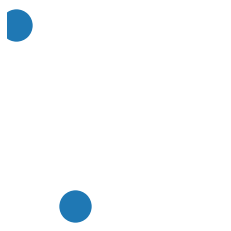

In [269]:
print(len(df['embedding'][0]))
visualize(0, 'Article_1',eps_=0.3, min_samples_= 3, n_=5, m_=0.9, show=True)

In [247]:
max_len = 0
max_ind = -1
for i in range(len(df['embedding'])):
  len_emb = len(df['embedding'][i])
  if len_emb > max_len:
    max_len = len_emb
    max_ind = i
max_len, max_ind

(48, 503)